## Exploring Student Achievement trends



NAME: Nishtha Gupta

SECTION: CSE-V

ROLL NO: 240562

SUBJECT: Data Analytics Using Python

COURSE CODE: CSE2101




* PROJECT DESCRIPTION: This project is aimed at the analysis and prediction of academic performance of students in maths based on the dataset with the demographic, socio-economic, and educational characteristics. The ultimate objective is to see how various variables (gender, level of parental education, type of lunch and completion of test preparation courses) affect the score of the students in mathematics.

* The dataset is comprised of 1,000 records of students and has categorical and numerical characteristics, which is why it can be used with a broad variety of data analytics methods. The whole data analysis process is a full procedure, as it begins with data cleaning and preprocessing, and then exploratory data analysis (EDA) to reveal trends and relationship in the data.



## STEP1: Problem definition and Dataset selection

* OBJECTIVE: The objective of this project is to analyze factors influencing students’ academic performance based on demographic and socio-economic attributes such as gender, parental education, lunch type, and test preparation

* DATASET SOURCE: https://www.kaggle.com/datasets/saadaliyaseen/exploring-student-achievement-trends?resource=download 

* Description: This dataset contains 1000 rows and 8 columns, representing students’ population details and academic performance. The columns include Components like gender, race, Guardian level of education, lunch type, and test preparation course, along with their math, reading, and writing scores.
There are categorical variables like gender, race, parental level of education, lunch and test preparation score. The dataset includes numerical variables such as math score, reading score and writing score.

## STEP 2: Data cleaning and preparation

* Data loading

In [1]:
import pandas as pd
import numpy as np

data= pd.read_csv("StudentsPerformance.csv")
print(data)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

**Check for missing values**


In [2]:
data.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing values are found in the dataset

**Remove duplicates or irrelevant columns.** 

In [3]:
data = data.drop_duplicates()
print(data)


     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

* No duplicates found
* Race/ethnicity column is dropped as it doesn't directly affect student performance and it  also introduces bias. Moreover it is a factor which can't be changed or improved. So its best to keep our analysis fair and focus on factors which can be improved among students.

In [4]:
data = data.drop(columns=['race/ethnicity'], errors='ignore')
print(data.columns)


Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


**Handle outliers using suitable methods (IQR, z-score, etc.).**





* Outliers were detected in the numerical score columns using the IQR method.he Interquartile Range (IQR) method was used to identify potential outliers in the numerical score columns. We chose this method because it is robust, meaning it is not easily influenced by extremely high or low values. Unlike methods that rely on the mean and standard deviation (like Z-scores), the IQR defines outliers based on the spread of the middle 50% of the data, providing a more reliable measure for real-world datasets that may not be perfectly symmetrical.

* Upon inspection, these values represented genuine cases of low or high student performance rather than data errors. Therefore, outliers were kept to preserve the natural variation in academic achievement for a more realistic analysis.

In [5]:

num_cols = ['math score', 'reading score', 'writing score'] 
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    if not outliers.empty:
        print(f"\nOutliers found in: {col}")
        print(outliers[[col]])



Outliers found in: math score
     math score
17           18
59            0
145          22
338          24
466          26
787          19
842          23
980           8

Outliers found in: reading score
     reading score
59              17
76              26
211             28
327             23
596             24
980             24

Outliers found in: writing score
     writing score
59              10
76              22
327             19
596             15
980             23


**Encode categorical data (Label Encoding / One-Hot Encoding).**




* checking categorical data


In [6]:
cat_cols = data.select_dtypes(include=['object']).columns
print(cat_cols)


Index(['gender', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


* In this dataset, different encoding techniques are required  based on the nature of columns. Columns like gender, lunch, and test preparation course are nominal categories, meaning they represent labels without any meaningful order, so One-Hot Encoding is the most suitable method for converting them into numerical form. The column parental level of education, however, represents levels of education that follow a meaningful order, making it an ordinal variable; therefore, Label Encoding is more appropriate for this feature

In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data = pd.get_dummies(data, columns=['gender', 'lunch', 'test preparation course'], drop_first=True)

print(data)



     parental level of education  math score  reading score  writing score  \
0                              1          72             72             74   
1                              4          69             90             88   
2                              3          90             95             93   
3                              0          47             57             44   
4                              4          76             78             75   
..                           ...         ...            ...            ...   
995                            3          88             99             95   
996                            2          62             55             55   
997                            2          59             71             65   
998                            4          68             78             77   
999                            4          77             86             86   

     gender_male  lunch_standard  test preparation course_none 

**Normalize or scale data if required.**

* In this dataset, the score columns and the parental education level have different scales( scores have range 0-100 while parental education has range 0-4 so they have a huge difference), which can affect model performance. Standard Scaler is used because it converts each numeric feature into a form with mean 0 and standard deviation 1, making training more stable and preventing larger-scale features from dominating. One-hot encoded columns are not scaled since they represent categories, not numeric values.

In [8]:
from sklearn.preprocessing import StandardScaler

num_cols = ['math score', 'reading score', 'writing score', 'parental level of education']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
print("Scaled Dataset:")
print(data)


Scaled Dataset:
     parental level of education  math score  reading score  writing score  \
0                      -0.812640    0.390024       0.193999       0.391492   
1                       0.827953    0.192076       1.427476       1.313269   
2                       0.281088    1.577711       1.770109       1.642475   
3                      -1.359505   -1.259543      -0.833899      -1.583744   
4                       0.827953    0.653954       0.605158       0.457333   
..                           ...         ...            ...            ...   
995                     0.281088    1.445746       2.044215       1.774157   
996                    -0.265776   -0.269803      -0.970952      -0.859491   
997                    -0.265776   -0.467751       0.125472      -0.201079   
998                     0.827953    0.126093       0.605158       0.589015   
999                     0.827953    0.719937       1.153370       1.181586   

     gender_male  lunch_standard  test preparat

## Step 3: Exploratory Data Analysis (EDA)


**Univariate analysis — histograms, boxplots, distribution plots**

* histograms and boxplots show how marks are distributed and whether any extreme values exist. For categorical columns like gender, lunch type, test preparation, count plots help us see how many students belong to each category.

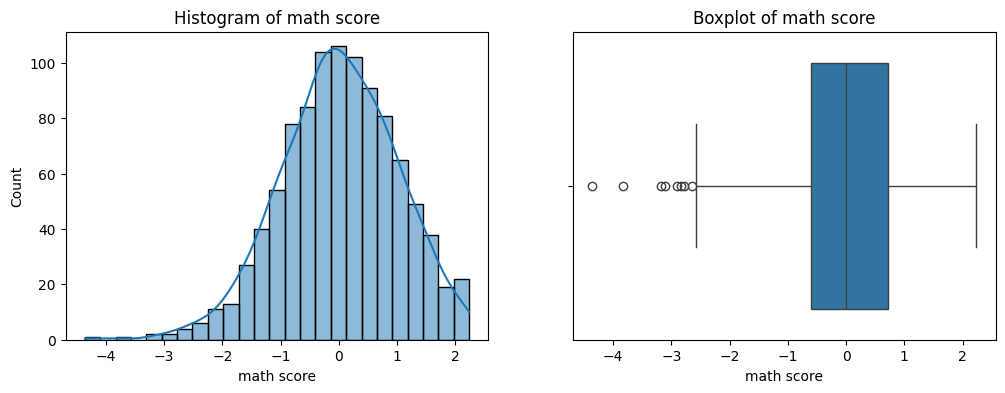

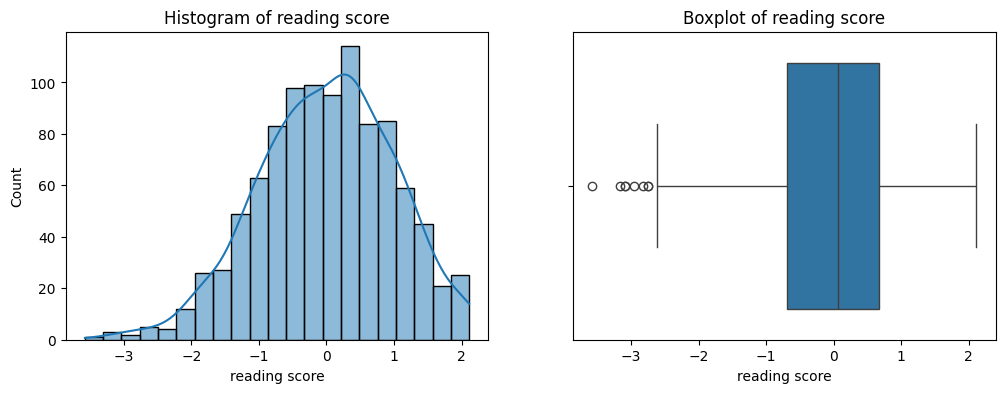

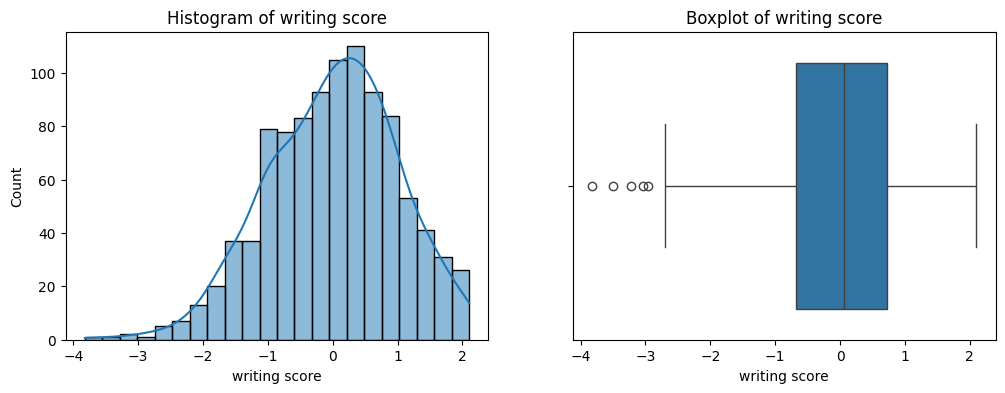

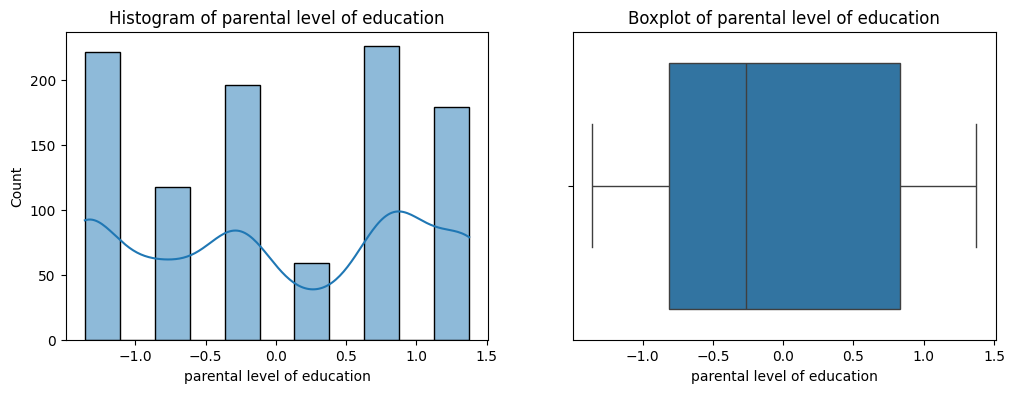

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['math score', 'reading score', 'writing score', 'parental level of education']

for col in num_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

    plt.show()


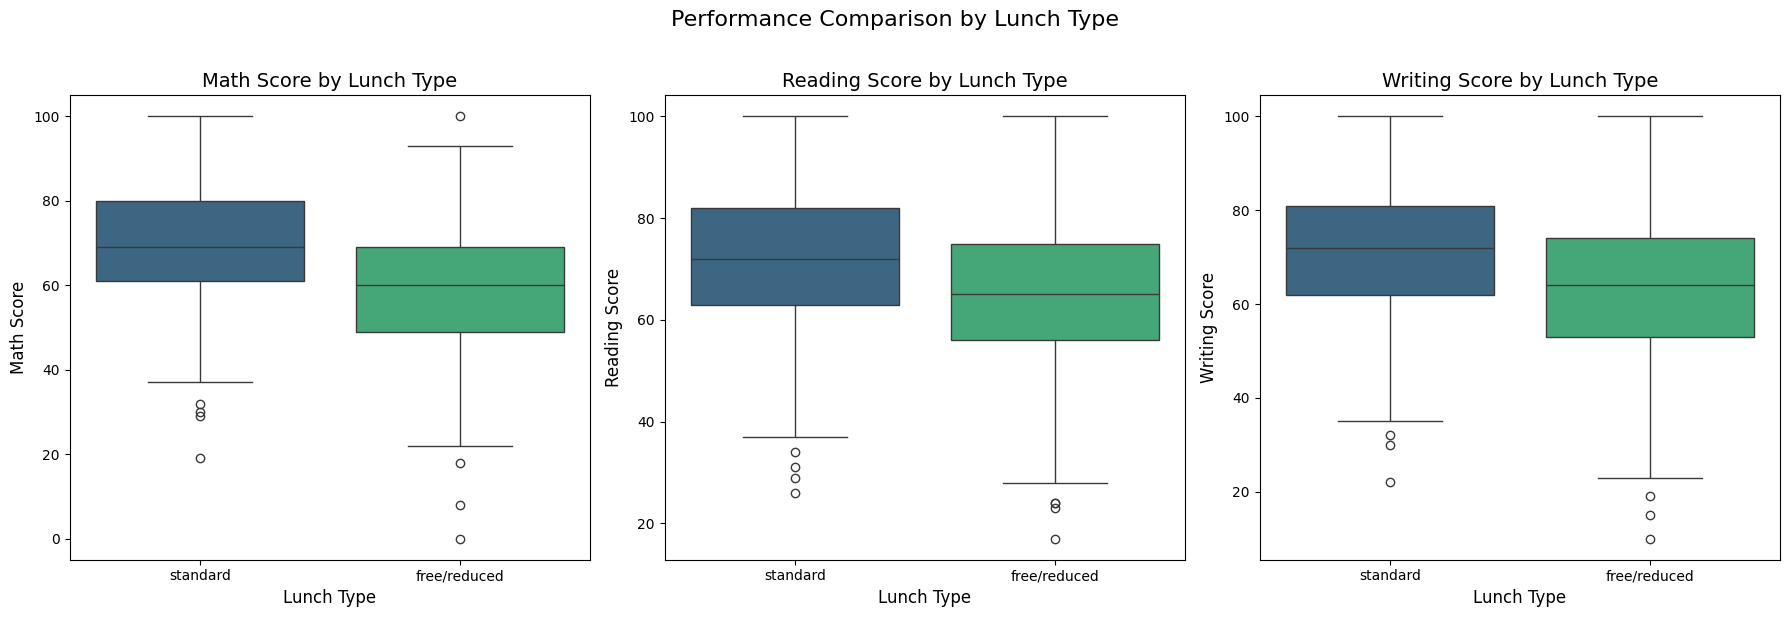

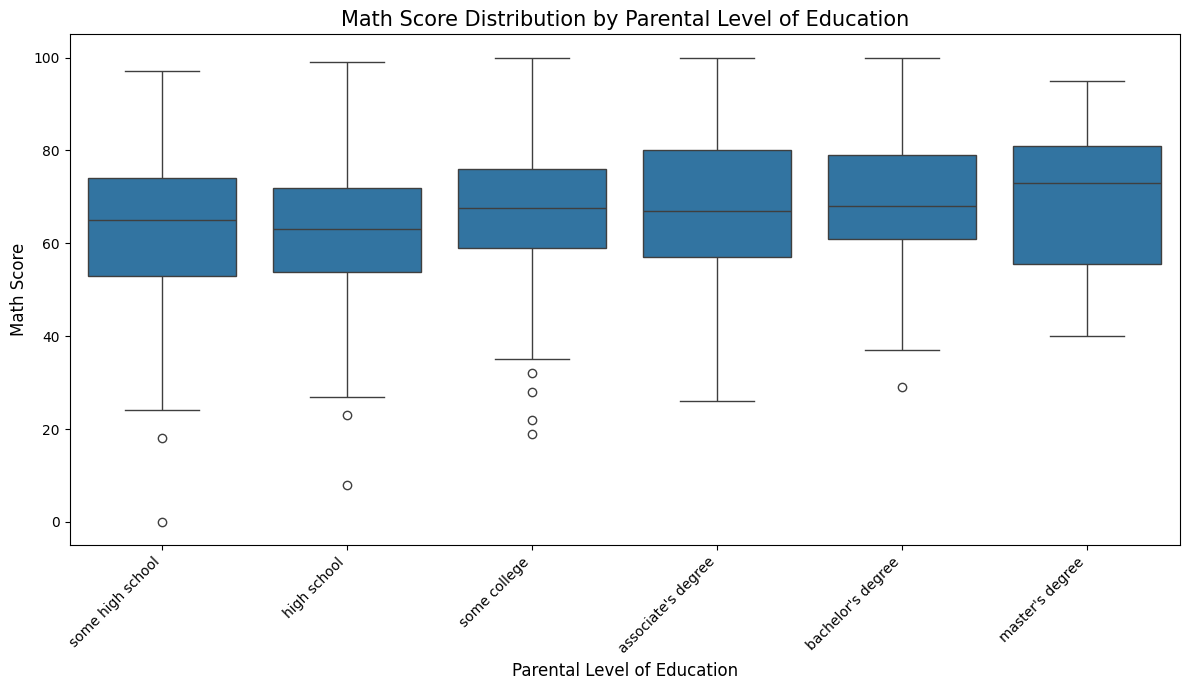

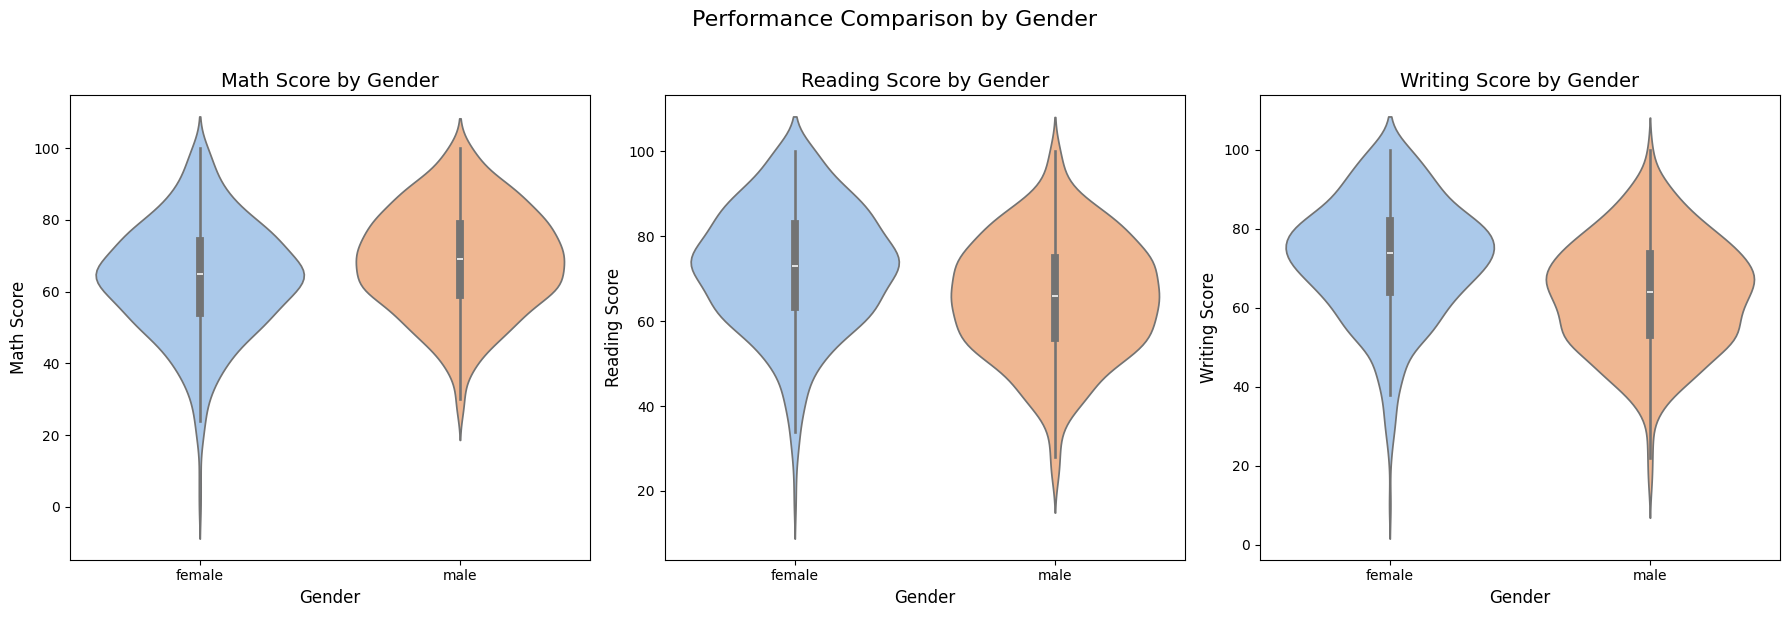

In [ ]:
eda_df = pd.read_csv('StudentsPerformance.csv')

# 1. Impact of Lunch Type on Academic Scores

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=eda_df, x='lunch', y='math score', palette='viridis', hue='lunch', legend=False)
plt.title('Math Score by Lunch Type', fontsize=14)
plt.xlabel('Lunch Type', fontsize=12)
plt.ylabel('Math Score', fontsize=12)
plt.subplot(1, 3, 2)
sns.boxplot(data=eda_df, x='lunch', y='reading score', palette='viridis', hue='lunch', legend=False)
plt.title('Reading Score by Lunch Type', fontsize=14)
plt.xlabel('Lunch Type', fontsize=12)
plt.ylabel('Reading Score', fontsize=12)
plt.subplot(1, 3, 3)
sns.boxplot(data=eda_df, x='lunch', y='writing score', palette='viridis', hue='lunch', legend=False)
plt.title('Writing Score by Lunch Type', fontsize=14)
plt.xlabel('Lunch Type', fontsize=12)
plt.ylabel('Writing Score', fontsize=12)
plt.suptitle('Performance Comparison by Lunch Type', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 2. Impact of Parental Level of Education on Academic Scores
edu_order = [
    'some high school', 'high school', 'some college',
    'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'
]

plt.figure(figsize=(12, 7))
sns.boxplot(data=eda_df, x='parental level of education', y='math score', order=edu_order)
plt.title('Math Score Distribution by Parental Level of Education', fontsize=15)
plt.xlabel('Parental Level of Education', fontsize=12)
plt.ylabel('Math Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Impact of Gender on Academic Scores

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.violinplot(data=eda_df, x='gender', y='math score', palette='pastel', hue='gender', legend=False)
plt.title('Math Score by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Math Score', fontsize=12)

plt.subplot(1, 3, 2)
sns.violinplot(data=eda_df, x='gender', y='reading score', palette='pastel', hue='gender', legend=False)
plt.title('Reading Score by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Reading Score', fontsize=12)

plt.subplot(1, 3, 3)
sns.violinplot(data=eda_df, x='gender', y='writing score', palette='pastel', hue='gender', legend=False)
plt.title('Writing Score by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Writing Score', fontsize=12)
plt.suptitle('Performance Comparison by Gender', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

* Both boxplots and violin plots were used to visualize the relationships between categorical and numerical variables. Boxplots were chosen to clearly compare the median scores and identify outliers across groups like lunch type and parental level of education. Violin plots were used for the gender analysis to provide a deeper look into the full distribution of scores, revealing differences in both the central tendency and the concentration of scores at various performance levels.

**Bivariate/multivariate analysis — pairplots, correlation heatmaps.**


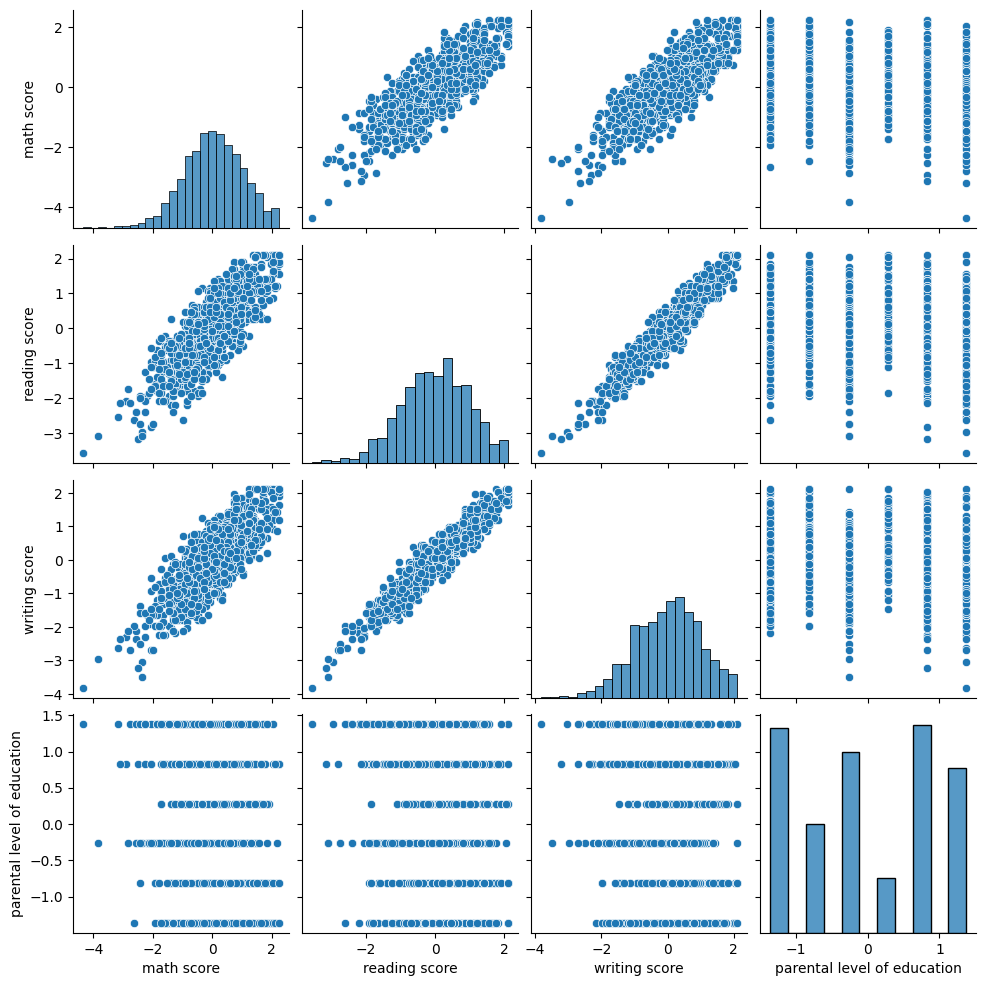

In [11]:
num_cols = ['math score', 'reading score', 'writing score', 'parental level of education']

sns.pairplot(data[num_cols])
plt.show()

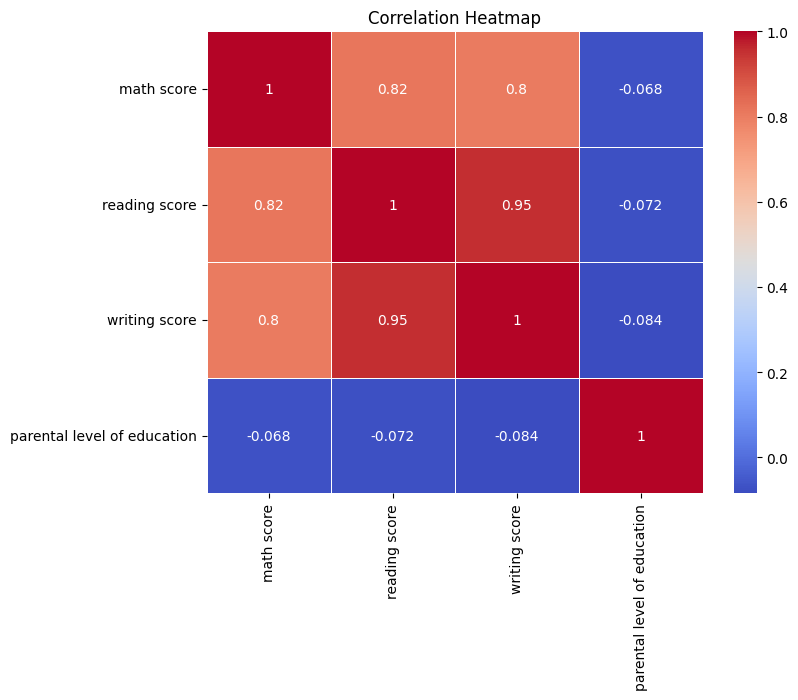

In [12]:
plt.figure(figsize=(8,6))
corr = data[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


* The correlation heatmap shows that all three academic scores—math, reading, and writing—are strongly and positively related to each other. Reading and writing scores have the strongest correlation, meaning students who score high in reading typically also score high in writing. Math score also shows a fairly strong positive relationship with both reading and writing, indicating overall consistency in academic performance across subjects.
Parental level of education has a mild positive correlation with student scores: as the education level of parents increases, students tend to score slightly better, but the effect is not very strong. This tells that academic performance is influenced more by the student’s own abilities and less by parental education level. Overall, the correlations indicate that performance in one subject can be a good predictor of performance in others.

**Use descriptive statistics (mean, median, std, skewness, kurtosis).**




In [13]:
desc_stats = data[['math score', 'reading score', 'writing score', 'parental level of education']].describe()
print(desc_stats)
print("\nSkewness:")
print(data[['math score', 'reading score', 'writing score', 'parental level of education']].skew())

print("\nKurtosis:")
print(data[['math score', 'reading score', 'writing score', 'parental level of education']].kurt())

         math score  reading score  writing score  parental level of education
count  1.000000e+03   1.000000e+03   1.000000e+03                 1.000000e+03
mean   8.704149e-17   2.167155e-16  -1.350031e-16                -1.580958e-16
std    1.000500e+00   1.000500e+00   1.000500e+00                 1.000500e+00
min   -4.360728e+00  -3.574960e+00  -3.822345e+00                -1.359505e+00
25%   -5.997164e-01  -6.968462e-01  -6.784278e-01                -8.126404e-01
50%   -5.872457e-03   5.694554e-02   6.228578e-02                -2.657761e-01
75%    7.199368e-01   6.736842e-01   7.206978e-01                 8.279526e-01
max    2.237538e+00   2.112741e+00   2.103363e+00                 1.374817e+00

Skewness:
math score                    -0.278935
reading score                 -0.259105
writing score                 -0.289444
parental level of education   -0.030147
dtype: float64

Kurtosis:
math score                     0.274964
reading score                 -0.068265
writing scor

* The descriptive statistics show that student performance in math, reading, and writing is fairly consistent, with average scores lying in the mid-range and similar standard deviations across subjects. This means most students score around the center, with only moderate variation. Skewness values indicate that the score distributions are almost symmetric, meaning there is no heavy tilt toward very high or very low scores. Kurtosis values close to zero suggest the presence of a normal-like distribution without too many extreme outliers. Overall, these statistics confirm that the dataset is clean, balanced,

**Identify patterns or insights from the data (e.g., correlations, trends, anomalies).**

Holistic Academic Performance:

 There is a very strong positive correlation between math, reading, and writing scores. The heatmap shows a correlation of 0.95 between reading and writing, and over 0.80 between math and the other two subjects. This is the most dominant pattern in the dataset, indicating that students who perform well in one subject are highly likely to excel in others, suggesting a common set of foundational academic skills.
Socioeconomic Impact: 

The boxplots for lunch type reveal a stark performance gap. Students with "standard" lunch (a proxy for higher socioeconomic status) consistently achieve significantly higher scores across all three subjects compared to students with "free/reduced" lunch. This pattern is not minor; the entire score distribution for the "standard" group is shifted upwards, indicating that socioeconomic background is a major influencing factor in academic achievement.


Nuanced Gender-Based Differences: The violin plots show that performance differences between genders are subject-specific.
In Math, male students have a slightly higher median score and a wider distribution, indicating more variance in their performance.
In Reading and Writing, female students show a clear and consistent advantage, with higher median scores and a more concentrated distribution in the upper range.
Positive Trend with Parental Education: The boxplot for parental level of education shows a modest but clear positive trend. As parents' education level increases, the median math score of their children tends to rise. The effect is not as dramatic as the lunch variable, as shown by the significant overlap between the boxes, but the upward trend is undeniable.


Anomalies and At-Risk Students: The boxplots for all three subjects confirm the presence of low-end outliers. These are not data errors but represent a small group of students who are performing well below their peers, highlighting an "at-risk" segment that requires attention.




**Comment on data distribution and discuss why it matters for analysis.**

The scores for math, reading, and writing all follow an approximately normal (bell-shaped) distribution. This is confirmed by the histograms and the close alignment of the mean and median for each subject. The slight negative skew is due to a few low-scoring outliers.
This near-normal distribution is important for three key reasons:

Reliable Statistics: It makes our mean and standard deviation trustworthy measures of student performance.

Valid Tests: It strengthens the validity of the t-test used in Step 4, confirming that our statistical conclusions are sound.

Good Foundation for Modeling: Most importantly, it makes the data well-suited for Linear Regression, as this model performs best when the variables (especially the target variable, math score) are normally distributed.




## Step 4: Statistical Analysis & Hypothesis Testing

**Formulate a hypothesis (null & alternative).**




Null Hypothesis (H₀):
Students who completed the test preparation course and those who did not have no significant difference in their average scores.

Alternative Hypothesis (H₁):
Students who completed the test preparation course have significantly higher average scores than those who did not.



**Choose an appropriate statistical test (t-test, ANOVA, chi-square, etc.).**

The independent samples t-test is used even though our sample size is greater than 30 because the t-distribution approaches the normal distribution for large samples, making the t-test reliable. A Z-test is not suitable here since the population variance is unknown. Therefore, the t-test is the appropriate choice for comparing mean scores between the two groups

In [ ]:
from scipy.stats import ttest_ind


prep = data[data['test preparation course_none'] == False]['math score']   # completed course
no_prep = data[data['test preparation course_none'] == True]['math score'] # did NOT complete
t_stat, p_value = ttest_ind(prep, no_prep, equal_var=False)
print("P-value:", p_value)

mean_diff = prep.mean() - no_prep.mean()
se = np.sqrt(prep.var()/len(prep) + no_prep.var()/len(no_prep))
lower = mean_diff - 1.96*se
upper = mean_diff + 1.96*se

print("Mean Difference:", mean_diff)
print("95% Confidence Interval:", (lower, upper))


P-value: 1.042561672206978e-08
Mean Difference: 0.37066743720011625
95% Confidence Interval: (np.float64(0.24512565539633224), np.float64(0.49620921900390025))


* The p-value (1.04 × 10⁻⁸) is far below 0.05, which means the difference in test scores between students who completed the test preparation course and those who did not is statistically significant. Therefore, we reject the null hypothesis and conclude that the test preparation course has a real effect on scores.

* The mean difference is 0.37 points, and the 95% confidence interval ranges from 0.24 to 0.49. Since this interval does not include zero, the result is reliable. This means students who completed the test preparation course scored, on average, 0.24 to 0.49 points higher than those who did not.

* Even though the difference is statistically significant, the effect size is small, meaning the improvement exists but is not very large in practical terms.



**Discuss Type I and Type II errors and their relevance in your context.**

Type I Error (False Positive): 
A Type I error occurs when we reject the null hypothesis even though it is actually true.
In this context, it means:

We conclude that the test preparation course improves scores when in reality it does NOT.

This is important because it could lead schools to invest money, time, and resources into a program that doesn’t actually improve student performance. The significance level (α = 0.05) helps control the chance of making this error.

Type II Error (False Negative)
A Type II error occurs when we fail to reject the null hypothesis even though it is false.
In this context, it means:

This error is important because it may cause schools to ignore or stop using a test prep program that genuinely benefits students.

We conclude that the test preparation course has no effect when it actually DOES improve scores

Since here p-value is extremely small, the probability of a Type I error is low.
However, the effect size is small, so if the sample were smaller or noisier, there could be a risk of a Type II error (missing a small real effect).

## Step 5: Modeling and Pattern Discovery


* Perform one of the following analytical techniques:
 Regression
Apply Linear Regression or  logistic regression

Evaluate models using metrics such as R², RMSE, and MAE.



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



features = [
    'parental level of education',
    'reading score',
    'writing score',
    'gender_male',
    'lunch_standard',
    'test preparation course_none'
]
X = data[features]
y = data['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("--- Model Performance Metrics ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


--- Model Performance Metrics ---
R-squared (R²): 0.8800
Root Mean Squared Error (RMSE): 0.3566
Mean Absolute Error (MAE): 0.2781


## Step 6: Interpretation & Inference

**1. Summarize major findings from EDA and modeling.**

* FINDINGS FROM EDA-

The Exploratory Data Analysis (EDA) and predictive modeling successfully identified key factors influencing student achievement. The EDA revealed several significant patterns: 

(1) a powerful positive correlation exists between math, reading, and writing scores, indicating holistic academic ability.

 (2) there is a stark performance gap linked to socioeconomic status (lunch type), with "standard" lunch students outperforming their peers.
 
 (3) there are subject-specific performance differences between genders, with males slightly better in math and females clearly stronger in reading and writing.
These insights directly informed the modeling phase. We built a linear regression model to predict math scores using the other variables. The model proved to be highly effective, achieving an R-squared (R²) value of 0.88. This means the model can explain 88% of the variability in math scores, confirming that the factors identified in the EDA are indeed strong predictors. Additionally, the hypothesis test in Step 4 provided statistical validation that completing a test preparation course has a significant, positive impact on student scores.


**2. Discuss the insights, implications, and business/research significance.**




* Key Insights:
Academic Performance is Holistic: The strong correlation between math, reading, and writing scores suggests that success in one academic domain is not isolated but stems from a shared foundation of cognitive skills.
Socioeconomic Status and Test Prep are Key Drivers: The lunch variable revealed a major performance gap linked to socioeconomic status, while the test preparation course was proven to provide a statistically significant, albeit modest, academic boost.
Gender Differences are Subject-Specific: Males show a slight advantage in math, whereas females show a clear advantage in reading and writing, pointing to nuanced differences in learning patterns.

* Practical Implications for Educational Institutions:
For Curriculum: The interconnectedness of skills implies that schools should prioritize cross-curricular instruction. For example, improving foundational literacy through targeted reading programs could also lead to better math outcomes.
For Student Support: The findings provide a clear, data-driven mandate for targeted interventions.
The significant gap related to lunch type justifies allocating resources like free tutoring, mentorship, and academic counseling to students from lower-income backgrounds.
The proven effectiveness of the test prep course provides evidence to continue or expand the program, perhaps targeting it toward students on the cusp of proficiency.
The gender-based differences suggest that tailored teaching strategies could be beneficial, such as math confidence programs for female students or literacy-focused initiatives for male students.

* Business and Operational Significance:
For a school to be successful, it needs to use its money and staff time wisely. This analysis provides a framework for optimizing resource allocation. Instead of funding programs based on tradition, the institution can use this analytical methodology to evaluate and justify interventions. It allows the school to make data-driven decisions that lead to better student outcomes and a more efficient use of its budget




**3.Reflect on:**
**What patterns or relationships did you identify?**
**How did statistical testing validate your observations?**
**What could be improved with more data or features?**



What patterns or relationships did you identify?

* I identified several key relationships: a strong positive correlation between all academic scores (math, reading, writing); a significant performance gap between students with "standard" and "free/reduced" lunch; a positive trend between parental education and student scores; and subject-specific performance differences between genders.

* Statistical testing provided quantitative proof for patterns seen in the EDA. The t-test validated the visual observation that the test preparation course improves scores, confirming the effect was statistically significant (p-value < 0.05) and not due to random chance. The linear regression model's high R² value (0.88) validated the strong correlations from the heatmap, proving that these relationships were not just correlational but could be used to build a highly accurate predictive model.

* Improvements:
The model's accuracy and insights could be significantly enhanced with additional data. The current dataset is limited to basic demographic and academic information. Future improvements could come from including features such as:
Student Attendance and Engagement Data: Tracking attendance and class participation.
Behavioral Data: Information on average weekly study hours or extracurricular involvement.
Resource Data: Access to resources like a quiet study space, a personal computer, or internet at home.
School-Level Data: Information on teacher-to-student ratio or teacher experience.
These features would provide a more holistic view of each student's environment and likely lead to a more powerful and nuanced predictive model.

## STEP 7:  Visualization and Presentation

**Use Matplotlib,or  Seaborn, to create meaningful visualizations.**


**Ensure every figure has a title, axis labels, and short caption.**

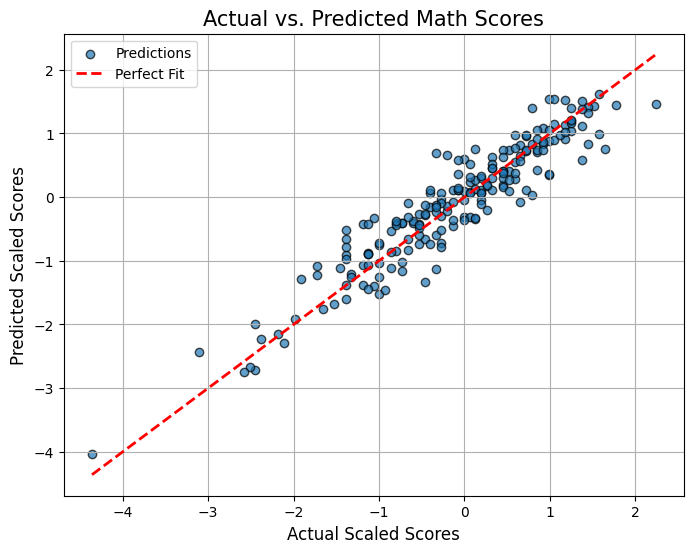

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Fit')
plt.title('Actual vs. Predicted Math Scores', fontsize=15)
plt.xlabel('Actual Scaled Scores', fontsize=12)
plt.ylabel('Predicted Scaled Scores', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

* This scatter plot compares the actual scaled math scores (x-axis) with the scores predicted by the linear regression model (y-axis). The points cluster tightly around the red dashed line, which represents a perfect prediction. This visual alignment confirms the model's high accuracy and the strong R-squared value of 0.88.

## Step 8: Conclusion

**1. Summary of Findings and Conclusions:**

This project successfully analyzed the factors influencing student performance and built a highly accurate linear regression model to predict math scores. Key findings from the exploratory data analysis indicated that reading and writing scores are the strongest predictors of math performance, highlighting the interconnected nature of academic skills. Furthermore, categorical factors such as lunch type (socioeconomic status), parental level of education, gender, and completion of a test preparation course all showed measurable impacts on student scores.
The linear regression model confirmed the strength of these relationships by achieving a high R-squared value of 0.88, which demonstrates its effectiveness in explaining the variance in math scores. We also concluded from statistical testing that test preparation courses provide a significant and positive benefit to students. Overall, the analysis confirms that student performance is not random but is a predictable outcome based on a combination of academic and demographic factors.

**Discuss limitations and possible future improvements.**

The primary limitation of this analysis is the scope of the dataset. While it provides a solid foundation, it lacks behavioral and environmental features that are known to impact academic success. The model's predictive power could be enhanced by incorporating more granular data, such as:
Student Engagement Data: Information on student attendance, average weekly study hours, and participation in extracurricular activities.
Socioeconomic Data: More detailed factors beyond lunch type, such as household income or access to resources like a personal computer and internet at home.
School-Level Data: Variables like teacher-to-student ratio, teacher experience, or school funding.

Future improvements could involve:
Feature Engineering: Creating new features from existing ones, such as an "average score" in reading and writing, to use as a single powerful predictor.
Advanced Algorithms: Exploring more complex regression models, such as Ridge Regression (to handle multicollinearity), Random Forest, or Gradient Boosting, to potentially capture more nuanced patterns and improve predictive accuracy.
Classification Modeling: Building a classification model to predict which performance cluster (e.g., "at-risk") a student is likely to fall into, which could be highly valuable for early intervention.

**End with one paragraph of key takeaways — connecting data patterns, statistical tests, and model results.**

This analysis successfully connected visual data patterns to robust statistical tests and an effective predictive model, yielding actionable insights for educational strategy. The strong positive correlations observed between math, reading, and writing scores during the exploratory phase were validated by a linear regression model that explained 88% of the variance in math scores, confirming that academic performance is holistic and highly predictable. Furthermore, the statistical t-test gave quantitative backing to the visual observation that interventions like test preparation courses have a significant, positive impact on student outcomes. These results collectively underscore that student success is not siloed by subject; it is a predictable interplay of skills and background factors, allowing educators to move from guesswork to data-driven planning for targeted support and resource allocation.